In [61]:
%load_ext lab_black

from puzzles import load, load_lines

import numpy as np

import matplotlib.pyplot as plt

The lab_black extension is already loaded. To reload it, use:
  %reload_ext lab_black


In [62]:
parse = lambda s: np.array([[".#".index(c) for c in l] for l in s.split("/")])
to_tuple = lambda a: tuple(a.ravel())

rules = {}

for line in load_lines(21):
    given, produces = line.split(" => ")
    given = parse(given)
    produces = parse(produces)
    rules[to_tuple(given)] = produces

In [63]:
def get_all_variants(A):
    return (
        A,
        A[:, ::-1],
        A[::-1],
        A[::-1, ::-1],
        A.T,
        A.T[:, ::-1],
        A.T[::-1],
        A.T[::-1, ::-1],
    )

In [64]:
def produce(crop, rules):
    for cr in get_all_variants(crop):
        if to_tuple(cr) not in rules:
            continue
        return rules[to_tuple(cr)]

In [67]:
pattern = parse(".#./..#/###")

for _ in range(5):
    step_size = 2 if pattern.shape[0] % 2 == 0 else 3
    pattern = np.concatenate(
        [
            np.concatenate(
                [
                    produce(pattern[i : i + step_size, j : j + step_size], rules)
                    for j in range(0, pattern.shape[1], step_size)
                ],
                axis=1,
            )
            for i in range(0, pattern.shape[0], step_size)
        ],
        axis=0,
    )
pattern.sum()

139

In [74]:
pattern = parse(".#./..#/###")

for _ in range(18):

    step_size = 2 if pattern.shape[0] % 2 == 0 else 3
    pattern = np.concatenate(
        [
            np.concatenate(
                [
                    produce(pattern[i : i + step_size, j : j + step_size], rules)
                    for j in range(0, pattern.shape[1], step_size)
                ],
                axis=1,
            )
            for i in range(0, pattern.shape[0], step_size)
        ],
        axis=0,
    )

    # plt.figure(figsize=(18, 18))
    # plt.imshow(pattern, cmap="summer")
    # plt.show()

pattern.sum()

1857134

---

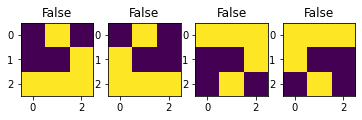

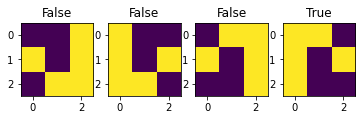

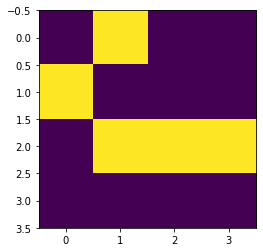

In [45]:
pattern = parse(".#./..#/###")

_, axs = plt.subplots(1, 4)
axs[0].imshow(pattern)
axs[1].imshow(pattern[:, ::-1])
axs[2].imshow(pattern[::-1])
axs[3].imshow(pattern[::-1, ::-1])
axs[0].set_title(to_tuple(pattern) in rules)
axs[1].set_title(to_tuple(pattern[:, ::-1]) in rules)
axs[2].set_title(to_tuple(pattern[::-1]) in rules)
axs[3].set_title(to_tuple(pattern[::-1, ::-1]) in rules)
plt.show()

_, axs = plt.subplots(1, 4)
axs[0].imshow(pattern.T)
axs[1].imshow(pattern.T[:, ::-1])
axs[2].imshow(pattern.T[::-1])
axs[3].imshow(pattern.T[::-1, ::-1])
axs[0].set_title(to_tuple(pattern.T) in rules)
axs[1].set_title(to_tuple(pattern.T[:, ::-1]) in rules)
axs[2].set_title(to_tuple(pattern.T[::-1]) in rules)
axs[3].set_title(to_tuple(pattern.T[::-1, ::-1]) in rules)
plt.show()

plt.imshow(rules[to_tuple(pattern.T[::-1, ::-1])])
plt.show()